In [1]:
def clamp(num, min_val, max_val):
    return max(min(num, max_val), min_val)


class InvertingSummingAmp():

    def __init__(self, r_fb, r_in, v_in, v_vari):
        self.r_fb = r_fb
        self.r_in = r_in
        self.v_in = v_in
        self.v_vari = v_vari
        self.v_supp_pos = 12
        self.v_supp_neg = -12

    def __call__(self, v_var):
        out = 0
        for i in range(len(self.r_in)):
            if (i == self.v_vari):
                v = v_var
            else:
                v = self.v_in[i]
            out = out + ((self.r_fb * v) / self.r_in[i])
        return clamp(-out, self.v_supp_neg, self.v_supp_pos)



amp1_out min = 3.3
amp1_out zero = 1.65
amp1_out max = -0.0
amp1_out range = 3.3


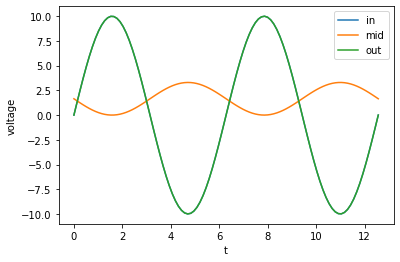

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#  Ramp input
# t_values = np.linspace(-10, 10, 100)
# input = t_values

# Sine input
t_values = np.linspace(0, 4*np.pi, 100)
input = np.sin(t_values)*10

opamp1 = InvertingSummingAmp(33000, [100000, 200000], [-5, 0], 1)
amp1_out = np.vectorize(opamp1)(input)

print(f"amp1_out min = {opamp1(-10)}")
print(f"amp1_out zero = {opamp1(0)}")
print(f"amp1_out max = {opamp1(10)}")
print(f"amp1_out range = {opamp1(-10)-opamp1(10)}")

opamp2 = InvertingSummingAmp(200000, [100000, 33000], [-5, 0], 1)
amp2_out = np.vectorize(opamp2)(amp1_out)


# plot values
fig, ax = plt.subplots()
ax.plot(t_values, input, label="in")
ax.plot(t_values, amp1_out, label="mid")
ax.plot(t_values, amp2_out, label="out")
ax.legend()

ax.set(xlabel='t', ylabel='voltage', title='')
plt.show()

amp1_out min = 4.7
amp1_out zero = 2.35
amp1_out max = -0.0
amp1_out range = 4.7


[Text(0.5, 0, 't'), Text(0, 0.5, 'voltage'), Text(0.5, 1.0, '')]

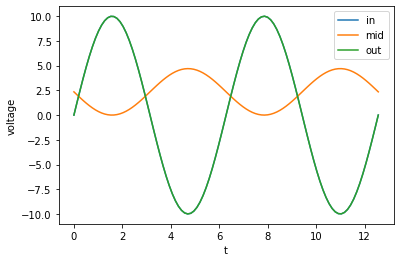

In [74]:
#  Ramp input
# t_values = np.linspace(-10, 10, 100)
# input = t_values

# Sine input
t_values = np.linspace(0, 4*np.pi, 100)
input = np.sin(t_values)*10

opamp1 = InvertingSummingAmp(47000, [100000, 200000], [-5, 0], 1)
amp1_out = np.vectorize(opamp1)(input)

print(f"amp1_out min = {opamp1(-10)}")
print(f"amp1_out zero = {opamp1(0)}")
print(f"amp1_out max = {opamp1(10)}")
print(f"amp1_out range = {opamp1(-10)-opamp1(10)}")

opamp2 = InvertingSummingAmp(200000, [100000, 47000], [-5, 0], 1)
amp2_out = np.vectorize(opamp2)(amp1_out)


# plot values
fig, ax = plt.subplots()
ax.plot(t_values, input, label="in")
ax.plot(t_values, amp1_out, label="mid")
ax.plot(t_values, amp2_out, label="out")
ax.legend()

ax.set(xlabel='t', ylabel='voltage', title='')